In [1]:
import sewpy
import aplpy
import astropy.units as u
import matplotlib.pyplot as plt

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
image_file = "AFC-1.alma.afc-1.noisy.image.fits"

params = ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 
          'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 
          'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']

config = {"DETECT_THRESH":3, "ANALYSIS_THRESH":3}

In [3]:
sew = sewpy.SEW(params=params, config=config)

out = sew(image_file)
data = out["table"]
print(data)

Ouch, SExtractor complains :
b''


NUMBER FLUX_ISO FLUXERR_ISO FLUX_AUTO ...  DELTA_SKY  ALPHA_J2000 DELTA_J2000
          ct         ct         ct    ...     deg         deg         deg    
------ -------- ----------- --------- ... ----------- ----------- -----------
     1 18.40691  0.04246563  22.19745 ... -50.0111492   9.9919496 -50.0111492
     2 17.69172  0.03362656  20.02785 ... -50.0131871   9.9758653 -50.0131871
     3 15.03358  0.04177642  22.21168 ... -50.0140193  10.0020039 -50.0140193
     4  9.67872  0.02693457  9.452746 ... -50.0158876   9.9856062 -50.0158876
     5 4.874851  0.01995938  5.322276 ...  -50.016319  10.0153639  -50.016319
     6  6.10598  0.02619887  7.018939 ...  -49.985007  10.0091665  -49.985007
     7 18.36481  0.03296182  19.66393 ... -49.9870003  10.0093965 -49.9870003
     8 4.419336  0.02125649  5.138991 ... -49.9842894  10.0243617 -49.9842894
     9 2.123768  0.01985831  5.417163 ... -49.9844044   9.9812751 -49.9844044
    10 7.293687  0.02419102   8.09113 ... -49.9850573  10.018127

In [4]:
ra, dec, flux = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX']
label = data['NUMBER'].astype('int')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -6.368e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.674e-02 [aplpy.core]


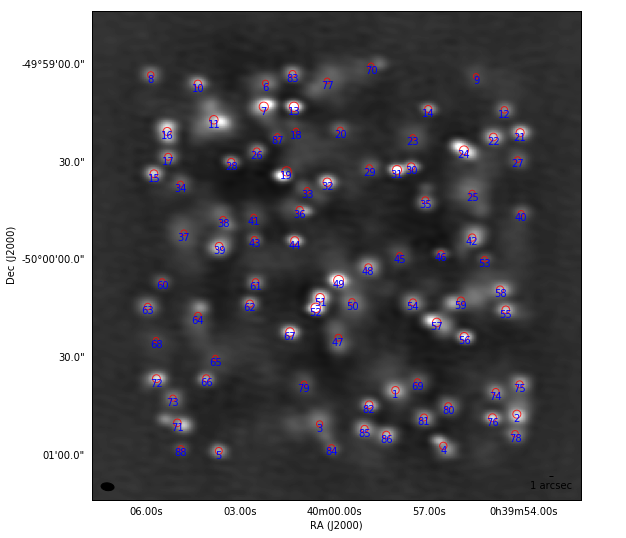

In [5]:
image = aplpy.FITSFigure(image_file)
#image.show_colorscale()#tretch='power', exponent=0.3)
image.show_grayscale()
#image.show_colorbar()
#image.show_contour(image_file, colors='blue', levels=lvlB6, alpha=0.3)


image.add_beam()
image.beam.set_color('black')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("black")

marker_size =  80 * flux/flux.max() + 20
image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=0.8)
# primary beam circle
#image.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

for i, lbl in enumerate(label): 
    image.add_label(ra[i], dec[i]-0.0004, lbl, color="blue")

#image.show_colorscale()

In [6]:
for i, f in enumerate(flux):
    print(label[i], ra[i], dec[i], f)

1 9.9919496 -50.0111492 0.01974585
2 9.9758653 -50.0131871 0.02415001
3 10.0020039 -50.0140193 0.01006769
4 9.9856062 -50.0158876 0.01822135
5 10.0153639 -50.016319 0.01542152
6 10.0091665 -49.985007 0.009791251
7 10.0093965 -49.9870003 0.03501629
8 10.0243617 -49.9842894 0.01093969
9 9.9812751 -49.9844044 0.00427036
10 10.0181276 -49.9850573 0.01935199
11 10.0160123 -49.9881144 0.02821783
12 9.9775281 -49.9872681 0.01202598
13 10.0054027 -49.9870114 0.03676168
14 9.987618 -49.9871999 0.01654981
15 10.0239472 -49.9927062 0.02158775
16 10.0221856 -49.989108 0.02437457
17 10.0220664 -49.991266 0.01511905
18 10.0051301 -49.9890528 0.003586381
19 10.0063663 -49.99251 0.03582976
20 9.9992664 -49.9889951 0.008369614
21 9.9754426 -49.9892131 0.02519532
22 9.9789849 -49.9895858 0.02135917
23 9.9896467 -49.9896156 0.005511612
24 9.9828733 -49.990718 0.0325328
25 9.9817846 -49.9943758 0.00888758
26 10.0103268 -49.9907989 0.01349869
27 9.9757717 -49.9915104 0.007748178
28 10.0137091 -49.9916986 0